In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Import Scikit-learn for Machine Learning libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv('simulated_TECHCO_data.csv', encoding='ISO-8859-1')
#df.to_excel('./staff_data.xlsx')
df

,time,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male,emp_id,turnover
0,1,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
1,2,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
2,3,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
3,4,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
4,5,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
...,...,...,...,...,...,...,...,...,...,...,...
34447,34,4.525592,5,3,59.80474,9,0.294030,40.82030,1,1191,Stayed
34448,35,4.525592,5,3,59.80474,9,0.294030,40.82030,1,1191,Stayed
34449,36,4.525592,5,3,59.80474,9,0.294030,40.82030,1,1191,Stayed
34450,37,4.525592,5,3,59.80474,9,0.294030,40.82030,1,1191,Stayed


# Обзор параметров набора данных/Overview of dataset parameters

**На русском:**
*   emp_id - идентификационный номер каждого сотрудника.
*   time - количество месяцев, проведенных сотрудником в компании.
*   training_score - оценка эффективности в течение трехмесячного курса адаптации.
*   logical_score - оценка математических способностей (тест в университете).
*   verbal_score - оценка вербального интеллекта (тест в университете).
*   avg_literacy - средняя грамотность в родном городе.
*   location_age - возраст компании.
*   distance - удаленность от родного города.
*   similar_language - языковое сходство региона (и компании) с языком родного города.
*   is_male - пол сотрудника.
*   turnover - остался/уволился в определенном месяце

**in English:**
*   emp_id - the identification number of each employee.
*   time - the number of months an employee has spent in the company.
*   training_score - evaluation of effectiveness during a three-month adaptation course.
*   logical_score - assessment of mathematical abilities (university test).
*   verbal_score - assessment of verbal intelligence (university test).
*   avg_literacy - average literacy in the hometown.
*   location_age - the age of the company.
*   distance - distance from your hometown.
*   similar_language - the linguistic similarity of the region (and the company) with the language of the hometown.
*   is_male - employee's gender.
*   turnover - stayed/quit in a certain month

#Очистка и подготовка данных/Data cleaning and preparation

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34452 entries, 0 to 34451
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              34452 non-null  int64  
 1   training_score    34452 non-null  float64
 2   logical_score     34452 non-null  int64  
 3   verbal_score      34452 non-null  int64  
 4   avg_literacy      34452 non-null  float64
 5   location_age      34452 non-null  int64  
 6   distance          34452 non-null  float64
 7   similar_language  34452 non-null  float64
 8   is_male           34452 non-null  int64  
 9   emp_id            34452 non-null  int64  
 10  turnover          34452 non-null  object 
dtypes: float64(4), int64(6), object(1)
memory usage: 2.9+ MB


In [38]:
df.describe()

,time,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male,emp_id
count,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000
mean,17.046529,4.496400,4.373999,4.650615,75.583604,15.344276,0.833396,59.186507,0.567804,599.649454
std,10.320377,0.435643,3.905698,4.472608,9.196516,7.919007,0.762817,35.286223,0.495388,340.873215
min,1.000000,2.688673,-5.000000,-7.000000,49.354540,2.000000,0.000000,1.250000,0.000000,1.000000
25%,8.000000,4.263266,1.000000,1.000000,68.548850,9.000000,0.191342,27.132500,0.000000,311.000000
50%,16.000000,4.578397,4.000000,4.000000,77.009510,11.000000,0.589657,49.118420,1.000000,603.000000
75%,26.000000,4.829628,8.000000,8.000000,82.778083,24.000000,1.316585,98.816540,1.000000,890.000000
max,39.000000,5.110679,12.000000,17.000000,97.357410,28.000000,3.200019,100.000000,1.000000,1191.000000


In [39]:
print(df[df.time==1].describe())

print(df[df.time==1][df.turnover==1].describe())

         time  training_score  logical_score  verbal_score  avg_literacy  \
count  1191.0     1191.000000    1191.000000   1191.000000   1191.000000   
mean      1.0        4.392502       4.473552      4.649874     75.712149   
std       0.0        0.544875       3.928876      4.438657      9.273565   
min       1.0        2.688673      -5.000000     -7.000000     49.354540   
25%       1.0        4.171338       1.000000      1.000000     68.657835   
50%       1.0        4.524776       4.000000      4.000000     77.161420   
75%       1.0        4.809570       8.000000      7.000000     82.838030   
max       1.0        5.110679      12.000000     17.000000     97.357410   

       location_age     distance  similar_language      is_male       emp_id  
count   1191.000000  1191.000000       1191.000000  1191.000000  1191.000000  
mean      15.222502     0.816037         59.643230     0.565911   596.000000  
std        7.939056     0.750328         35.303239     0.495845   343.956393  

<ipython-input-39-498006fcb9ff>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df.time==1][df.turnover==1].describe())


In [40]:
print(df[df.turnover==0][df.time!=1].info())

print(df[df.turnover==1][df.time!=1].info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              0 non-null      int64  
 1   training_score    0 non-null      float64
 2   logical_score     0 non-null      int64  
 3   verbal_score      0 non-null      int64  
 4   avg_literacy      0 non-null      float64
 5   location_age      0 non-null      int64  
 6   distance          0 non-null      float64
 7   similar_language  0 non-null      float64
 8   is_male           0 non-null      int64  
 9   emp_id            0 non-null      int64  
 10  turnover          0 non-null      object 
dtypes: float64(4), int64(6), object(1)
memory usage: 0.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              0 non-null      int64  
 1

<ipython-input-40-93c17487f3c0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df.turnover==0][df.time!=1].info())
<ipython-input-40-93c17487f3c0>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df.turnover==1][df.time!=1].info())


In [41]:
df[df.time!=1].describe()

,time,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male,emp_id
count,33261.000000,33261.000000,33261.000000,33261.000000,33261.000000,33261.000000,33261.000000,33261.000000,33261.000000,33261.000000
mean,17.621118,4.500120,4.370434,4.650642,75.579001,15.348637,0.834018,59.170153,0.567872,599.780133
std,10.038605,0.430765,3.904878,4.473885,9.193852,7.918373,0.763264,35.286035,0.495379,340.766787
min,2.000000,2.688673,-5.000000,-7.000000,49.354540,2.000000,0.000000,1.250000,0.000000,1.000000
25%,9.000000,4.269116,1.000000,1.000000,68.548850,9.000000,0.191342,27.132500,0.000000,311.000000
50%,17.000000,4.578602,4.000000,4.000000,77.009510,11.000000,0.589657,48.800010,1.000000,604.000000
75%,26.000000,4.830236,8.000000,8.000000,82.776390,24.000000,1.320347,98.816540,1.000000,890.000000
max,39.000000,5.110679,12.000000,17.000000,96.931760,28.000000,3.200019,100.000000,1.000000,1191.000000


In [42]:
# Проверка уникальности данных в столбцах
print(f"Колонка | Кол-во уникальных значений")
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")


Колонка | Кол-во уникальных значений
time: 39 distinct values
training_score: 1190 distinct values
logical_score: 18 distinct values
verbal_score: 25 distinct values
avg_literacy: 1190 distinct values
location_age: 21 distinct values
distance: 1087 distinct values
similar_language: 941 distinct values
is_male: 2 distinct values
emp_id: 1191 distinct values
turnover: 2 distinct values


In [43]:
processing_mapping = {
    "Stayed": 0,
    "Left": 1
}

df['turnover'] = df['turnover'].map(processing_mapping)
df

,time,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male,emp_id,turnover
0,1,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,0
1,2,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,0
2,3,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,0
3,4,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,0
4,5,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
34447,34,4.525592,5,3,59.80474,9,0.294030,40.82030,1,1191,0
34448,35,4.525592,5,3,59.80474,9,0.294030,40.82030,1,1191,0
34449,36,4.525592,5,3,59.80474,9,0.294030,40.82030,1,1191,0
34450,37,4.525592,5,3,59.80474,9,0.294030,40.82030,1,1191,0


In [44]:
data = df.copy()

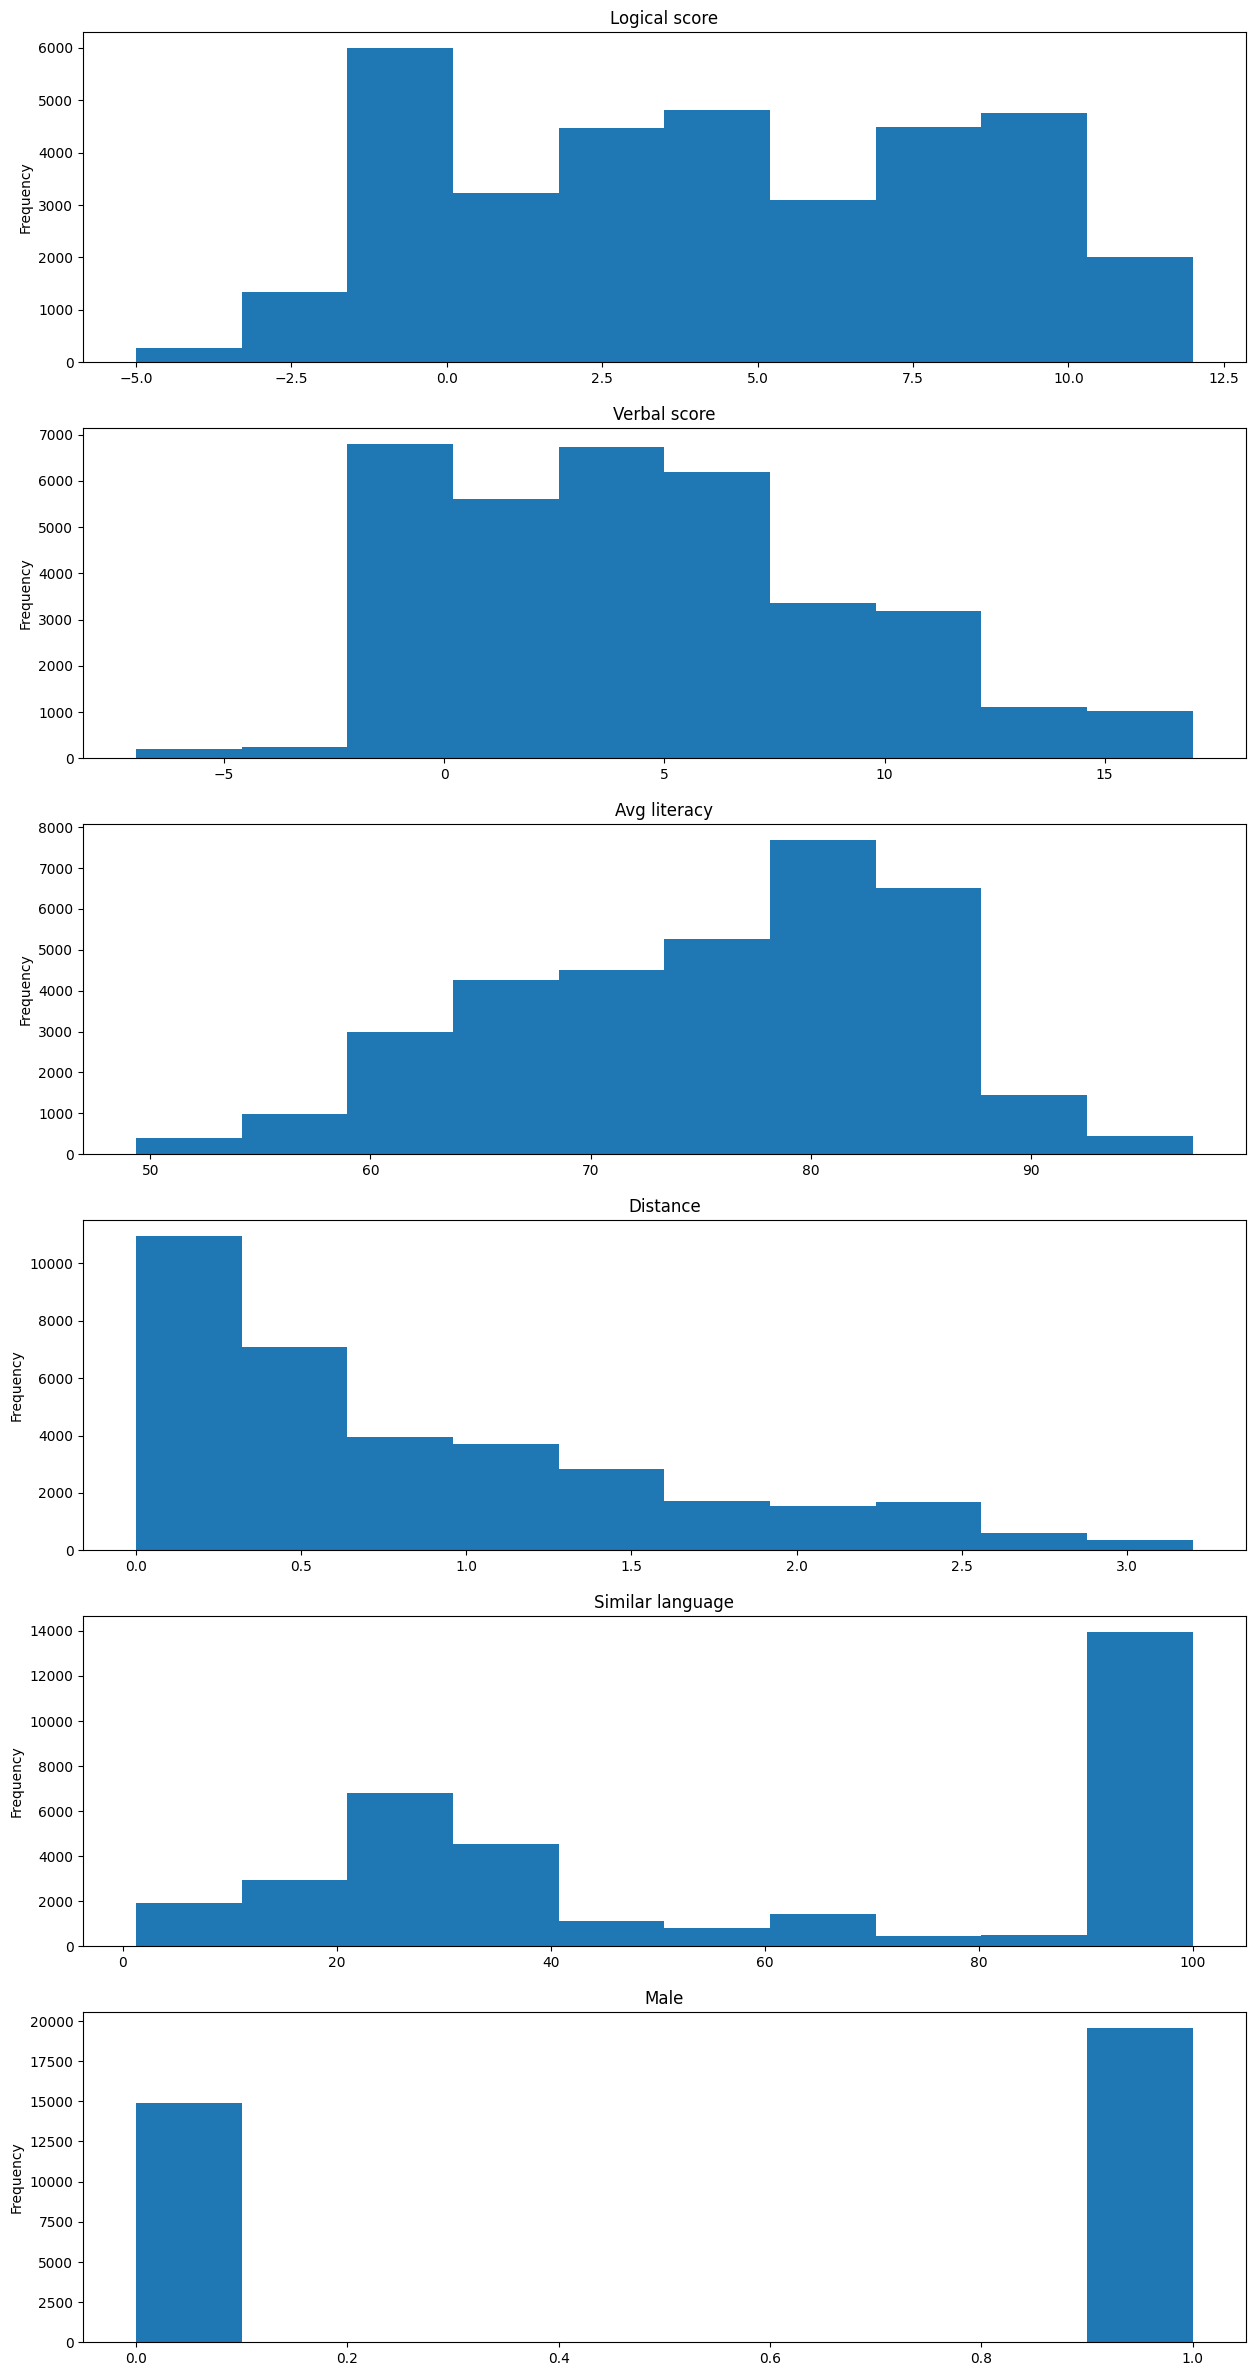

In [45]:
fig, axs = plt.subplots(6, 1, figsize=(15, 30))

data['logical_score'].plot(kind='hist', ax=axs[0],  title='Logical score')
data['verbal_score'].plot(kind='hist', ax=axs[1], title='Verbal score')
data['avg_literacy'].plot(kind='hist', ax=axs[2], title='Avg literacy')
data['distance'].plot(kind='hist', ax=axs[3],  title='Distance')
data['similar_language'].plot(kind='hist', ax=axs[4], title='Similar language')
data['is_male'].plot(kind='hist', ax=axs[5], title='Male')

plt.show()

# Корреляционный анализ/Correlation analysis

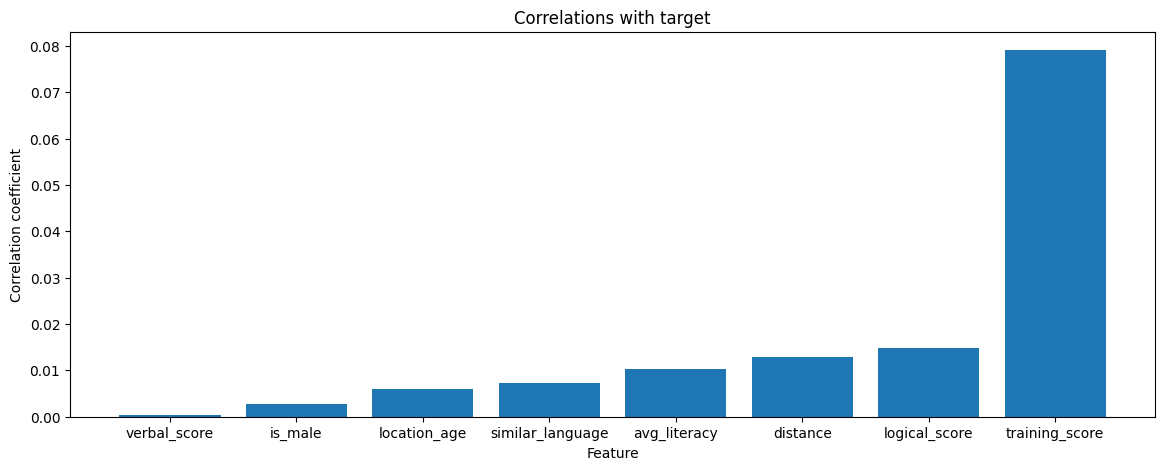

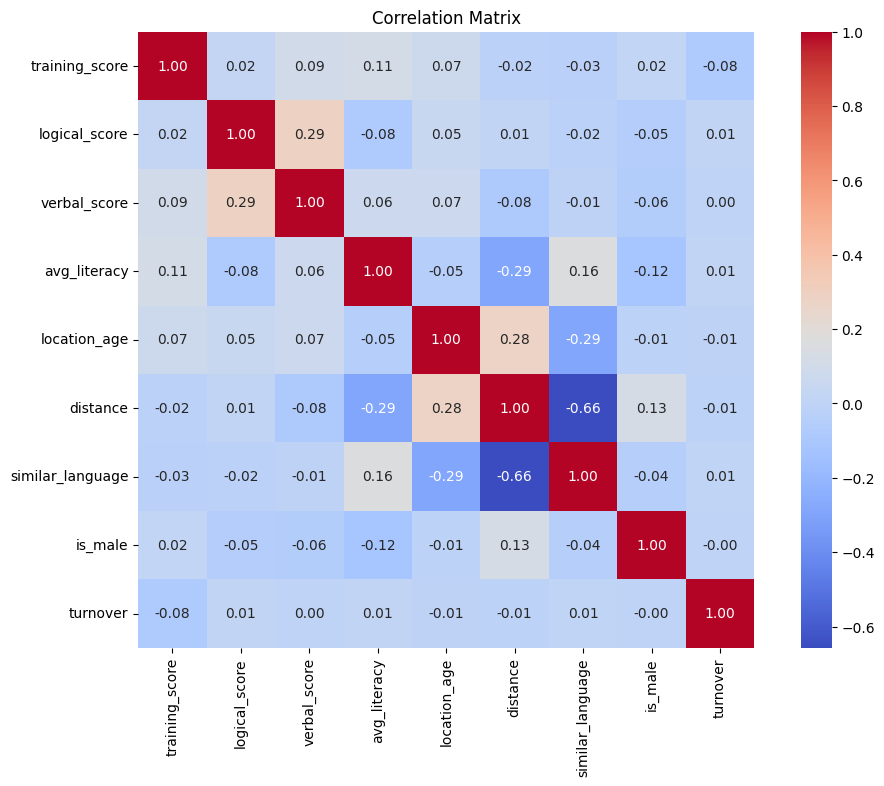

In [46]:
columns_to_drop = ['emp_id', 'time']

data.drop(columns_to_drop, axis=1, inplace=True)

corr_with_target = data.corr()['turnover'].abs().sort_values()

corr_with_target = corr_with_target.drop('turnover')

#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(corr_with_target.index, corr_with_target.values)
ax.set_title('Correlations with target')
ax.set_xlabel('Feature')
ax.set_ylabel('Сorrelation coefficient');

correlation_matrix = data.corr()

# Построение тепловой карты корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

**На Русском:**

Интерпретация результата:

1/ Параметры distance (удаленность от родного города) и similar_language (языковое сходство региона (и компании) с языком родного города) имеют высокое отрицательное значение коэффициента корреляции Пирсона (-0.66).

2/ Параметр training score (оценка эффективности в течение курса адаптации) имеет самое высокое (но, тем не менее, низкое) значение коэффициента корреляции Пирсона с значением turnover (по модулю 0.08).

3/ В среднем, остальные параметры имеют один уровень значения коэффициента корреляции Пирсона между собой (исключая, случайные корреляции).


**in English:**

Interpretation of the result:

1/ The parameters distance (distance from the hometown) and similar_language (linguistic similarity of the region (and company) with the language of the hometown) have a high negative value of the Pearson correlation coefficient (-0.66).

2/ The training score parameter (assessment of effectiveness during the course of adaptation) has the highest (but, nevertheless, low) value of the Pearson correlation coefficient with the value of the turnover (modulo 0.08).

3/ On average, the remaining parameters have the same value level of the Pearson correlation coefficient among themselves (excluding random correlations).

# Обучение моделей машинного обучения/Machine Learning Model Training

In [47]:
# Деление данных на обучающую и тестовую выборки
x = df.drop('turnover', axis=1)
y = df['turnover']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
# Применение SMOTE для балансировки классов
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

rt = RandomForestClassifier(class_weight='balanced', random_state=42)
rt.fit(x_train_resampled, y_train_resampled)

predictions_1 = rt.predict(x_test)
print('RandomForestClassifier')
print(classification_report(y_test, predictions_1))
print('ROC AUC:', roc_auc_score(y_test, rt.predict_proba(x_test)[:, 1]))


et = ExtraTreesClassifier(class_weight='balanced', random_state=42)
et.fit(x_train_resampled, y_train_resampled)

predictions_2 = et.predict(x_test)
print('ExtraTreesClassifier')
print(classification_report(y_test, predictions_2))
print('ROC AUC:', roc_auc_score(y_test, et.predict_proba(x_test)[:, 1]))

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6783
           1       0.17      0.04      0.06       108

    accuracy                           0.98      6891
   macro avg       0.58      0.52      0.53      6891
weighted avg       0.97      0.98      0.98      6891

ROC AUC: 0.8353597774392407
ExtraTreesClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6783
           1       0.00      0.00      0.00       108

    accuracy                           0.98      6891
   macro avg       0.49      0.50      0.49      6891
weighted avg       0.97      0.98      0.97      6891

ROC AUC: 0.8111734947390262


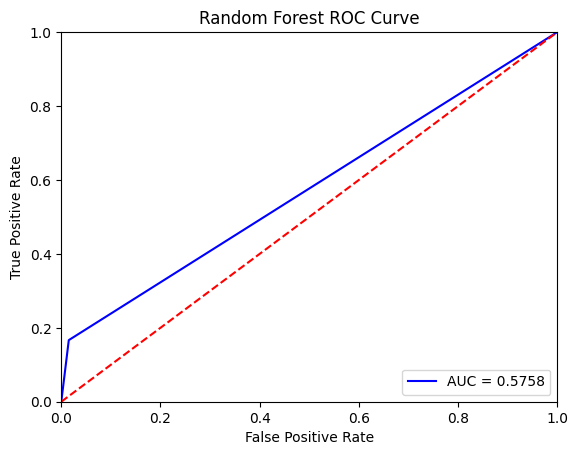

In [50]:
fpr,tpr,thresholds = roc_curve(predictions_1, y_test, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.title('Random Forest ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

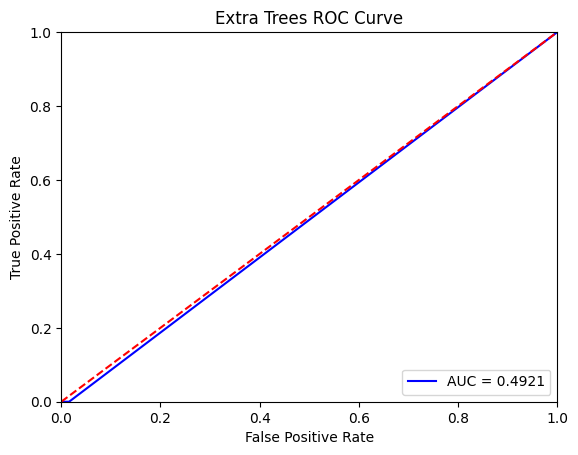

In [51]:
fpr,tpr,thresholds = roc_curve(predictions_2, y_test, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.title('Extra Trees ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()